In [59]:
import polars as pl
import seaborn as sns
import matplotlib as plt
import pandas as pd
from icecream import ic
D = pd.read_csv('../data/scene_data')
D = pl.from_pandas(D)

In [62]:
D.filter(
    pl.col('SeasonNr') == 1
).select(pl.col('Scene')).unique()

#D.filter(pl.col('ScreenLine') == np.nan)
#import numpy as np
#D['ScreenLine'].to_numpy()[D['ScreenLine'].to_numpy() == np.nan]

Scene
str
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"


In [4]:
#scenes_count = (D
#    .group_by(pl.col('Person'))
#    .agg(pl.col('EpisodeTitle').count().alias('count'))
#)
#sns.histplot(x=scenes_count['count'])

In [5]:

#sns.histplot(x=scenes_count['count'])

In [6]:
# Amount of unique scenes 
#Nscenes = D['Scene'].unique().len() 
#ic(Nscenes)

# Number of spoken lines for each scene seen
#scenes_count = (D
#    .group_by(pl.col('Scene'))
#    .agg(pl.col('EpisodeTitle').count().alias('count'))
#)

#tmp = scenes_count.filter(pl.col('count') > 60)
#sns.barplot(y=tmp['Scene'].to_numpy(), x=tmp['count'].to_numpy())

In [43]:
metadata = pd.read_csv('../data/characher_metadata2.csv')
metadata_name = list(metadata.iloc[:,0])
metadata_name = set([name.lower() for name in metadata_name])
"stone" in metadata_name

False

In [44]:
D.with_columns(pl.when(pl.col('Person') == "waymar royce")
               .then(pl.lit('A'))
               .alias('test')
                )

Unnamed: 0,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,test
i64,str,i64,i64,str,str,str,str
0,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""","""What d'you exp…","""A"""
1,"""will""",1,1,"""winter is comi…","""Unnamed Scene""","""I've never see…",null
2,"""waymar royce""",1,1,"""winter is comi…","""Unnamed Scene""","""How close did …","""A"""
3,"""will""",1,1,"""winter is comi…","""Unnamed Scene""","""Close as any m…",null
4,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""","""We should head…",null
5,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""","""Do the dead fr…",null
6,"""gared""",1,1,"""winter is comi…","""Unnamed Scene""","""Our orders wer…",null
7,"""yohn royce""",1,1,"""winter is comi…","""Unnamed Scene""","""You don't thin…",null
8,"""will""",1,1,"""winter is comi…","""Unnamed Scene""","""Whatever did i…",null


In [45]:
# Remove a few wierd additions in metadate
metadata_name.remove('horse')
metadata_name.remove('file:the riverlands.png')
metadata_name.remove('de:winterfell')
metadata_name.remove('the prince of winterfell')
metadata_name.remove("king's landing rioter")


In [48]:

# Add costum locations
locations = ["King's Landing", 'the riverlands','Winterfell', 'The North','The Wall','blackwater bay','vision of the past','the frozen lake','the baratheon fleet', 'Dragonstone', 'Braavos', 'Meereen', 'Astapor', 'Yunkai', 'the godswood','stark war camp','Qarth', 'The Vale of Arryn', 'The Riverlands', 'Riverlands','The Reach', 'Dorne', 'Casterly Rock', 'Harrenhal', 'Pyke', 'Highgarden', "Storm's End", 'Riverrun', 'Castle Black', 'White Harbor', 'Oldtown', 'Pentos', 'Volantis', 'Lys', 'Norvos', 'Lorath', 'the vale','The Eyrie', 'Sunspear', 'The Twins', 'Moat Cailin', 'Sisterton', 'Lannisport', 'Dragonstone', 'Dreadfort', "Mole's Town", 'Saltpans', 'The Arbor', 'Seagard', 'Greywater Watch', 'Deepwood Motte', 'Karhold', 'Duskendale', 'Horn Hill', 'Fairmarket', 'Crackclaw Point', "King'swood", 'The Neck', 'Blackhaven', 'Stokeworth', 'Rat Cook Inn', 'Stoney Sept', 'Gulltown', 'Qohor', 'Ny Sar', 'Ib', 'Braavos', 'Lorath', 'Saath', 'Vaes Dothrak', 'Lhazar', 'Leng', 'Asshai', 'Yi Ti', 'Bitterbridge', 'Bronzegate', 'Dyre Den', 'Felwood', 'Golden Tooth', 'Ghoyan Drohe', 'Great Fork', 'Hayford', 'Hedge Knight Inn', 'Inn at the Crossroads', "Ironman\'s Bay", 'Irongate', 'Kayce', 'Last River', 'The Fingers', 'Sallydance', 'Stoney Sept', 'Whispers', 'Wickendon', 'Wolfswood', 'Wyl', 'Yronwood', 'White Tree', 'Three Sisters', "Storrold's Point", 'Starfall', 'Sharp Point', 'Sarsfield', 'Ryamsport', 'Red Fork', 'Ramsgate', 'Oxcross']  # Add more locations as needed
locations = locations +  ['Council Chamber',"craster's keep",'dragon pit',"robb's camp",'the citadel','the broken farmhouse', "littlefinger's chambers", 'stark encampment', "tyrion's chambers", 'stark/lannister battle', 'targaryen fleet', 'the wedding reception', 'the stark and targaryen army', 'great weirwood tree', 'the crypt', "bran's chambers", 'red keep', "joffrey's chambers", "stannis's stormlands army camp", 'house of the undying', 'baratheon war camp', "sansa's chambers", "cersei's chambers"]

D=D.with_columns(pl.lit(None).alias('scene_locations'))
locationsset = set([x.lower() for x in locations])
from fuzzywuzzy import fuzz
from tqdm import tqdm
fuzz.partial_ratio('dragonstone - chamber of the abc','dragon stone')
unique_scenes = D['Scene'].unique()
for scene in tqdm(unique_scenes):
    final_rename = None
    og_scene = scene
    scene = scene.lower()
    # Remove unique identifier
    scene = scene.split('_')[0:-1]
    scene =''.join(scene)
    # Remove specific location ie. winterfell – courtyard  or essos, outside yunkai
    if '–' in scene:
        scene = scene.split('–')[0]
        scene =''.join(scene)
    if '-' in scene:
        scene = scene.split('-')[0]
        scene =''.join(scene)
    if ',' in scene:
        scene = scene.split(',')[0]
        scene =''.join(scene)

    # calculate fuz ratio for each location, scene pair. 
    # pick the highest ratio if above threshold
    max_fuzzy_ratio = [0, None, None]
    for name in metadata_name:
        fuzzy_ratio = fuzz.token_sort_ratio(scene, name)
        if fuzzy_ratio > max_fuzzy_ratio[0]:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = name
    threshold = 80
    if max_fuzzy_ratio[0] > threshold:
        final_rename = max_fuzzy_ratio
        #print('MATCH LONG:',final_rename)

    # Now also check pure locations as seen in location vector and take the best of them if they have a good match
    max_fuzzy_ratio = [0, None, None]
    for name in locations:
        fuzzy_ratio = fuzz.token_sort_ratio(scene, name)
        if fuzzy_ratio > max_fuzzy_ratio[0]:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = name
    threshold = 80
    if max_fuzzy_ratio[0] > threshold:
        final_rename = max_fuzzy_ratio
        #print('MATCH SHORT:',final_rename)
    
    # Lastly check if any has the eact location in if none found yet
    if final_rename is None:
        add = False
        to_add = None
        for location in locationsset:
            found = scene.find(location)
            if found != -1:
                add = True
                to_add = location

        if add:
            max_fuzzy_ratio[0] = fuzzy_ratio
            max_fuzzy_ratio[1] = og_scene
            max_fuzzy_ratio[2] = to_add   
            final_rename = max_fuzzy_ratio
            #print('PARTIAL MATCH:' , scene, final_rename)

    if final_rename is None:
        #print('NOT MATCH:', og_scene, '| Scene formatted:', scene)
        pass
    # If found a clear location name, then add it to the dataframe.
    if final_rename is not None:
        D = D.with_columns(pl.when(pl.col('Scene') == final_rename[1])
                        .then(pl.lit(final_rename[2].lower()))
                        .otherwise(pl.col('scene_locations'))
                        .alias('scene_locations')
                        )
        #print('MATCH:', final_rename)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 972/972 [00:37<00:00, 25.92it/s]


In [49]:
# check which arent in anymore
D.filter(
    pl.col('scene_locations').is_null()
    ) .select('Scene').unique().to_numpy()
# Read to csv
D.to_pandas().to_csv('../data/scene_data_with_location.csv')

In [63]:
# Read from csv
D = pd.read_csv('../data/scene_data_with_location.csv')
D = pl.from_pandas(D)
# Filter out null for scene_locations
D_not_null = D.filter(
    pl.col('scene_locations').is_not_null()
    )

In [351]:
# Numbers of lines spoken in each location
scenes_count = D_not_null.group_by(pl.col('scene_locations')).agg(pl.col('scene_locations').count().alias('count'))
tmp = scenes_count.filter(pl.col('count') > 1).sort(pl.col('count'))
sns.set(rc={'figure.figsize':(120,20)})
sns.barplot(y=tmp['scene_locations'].to_numpy(), x=tmp['count'].to_numpy())

<Axes: >

<Axes: >

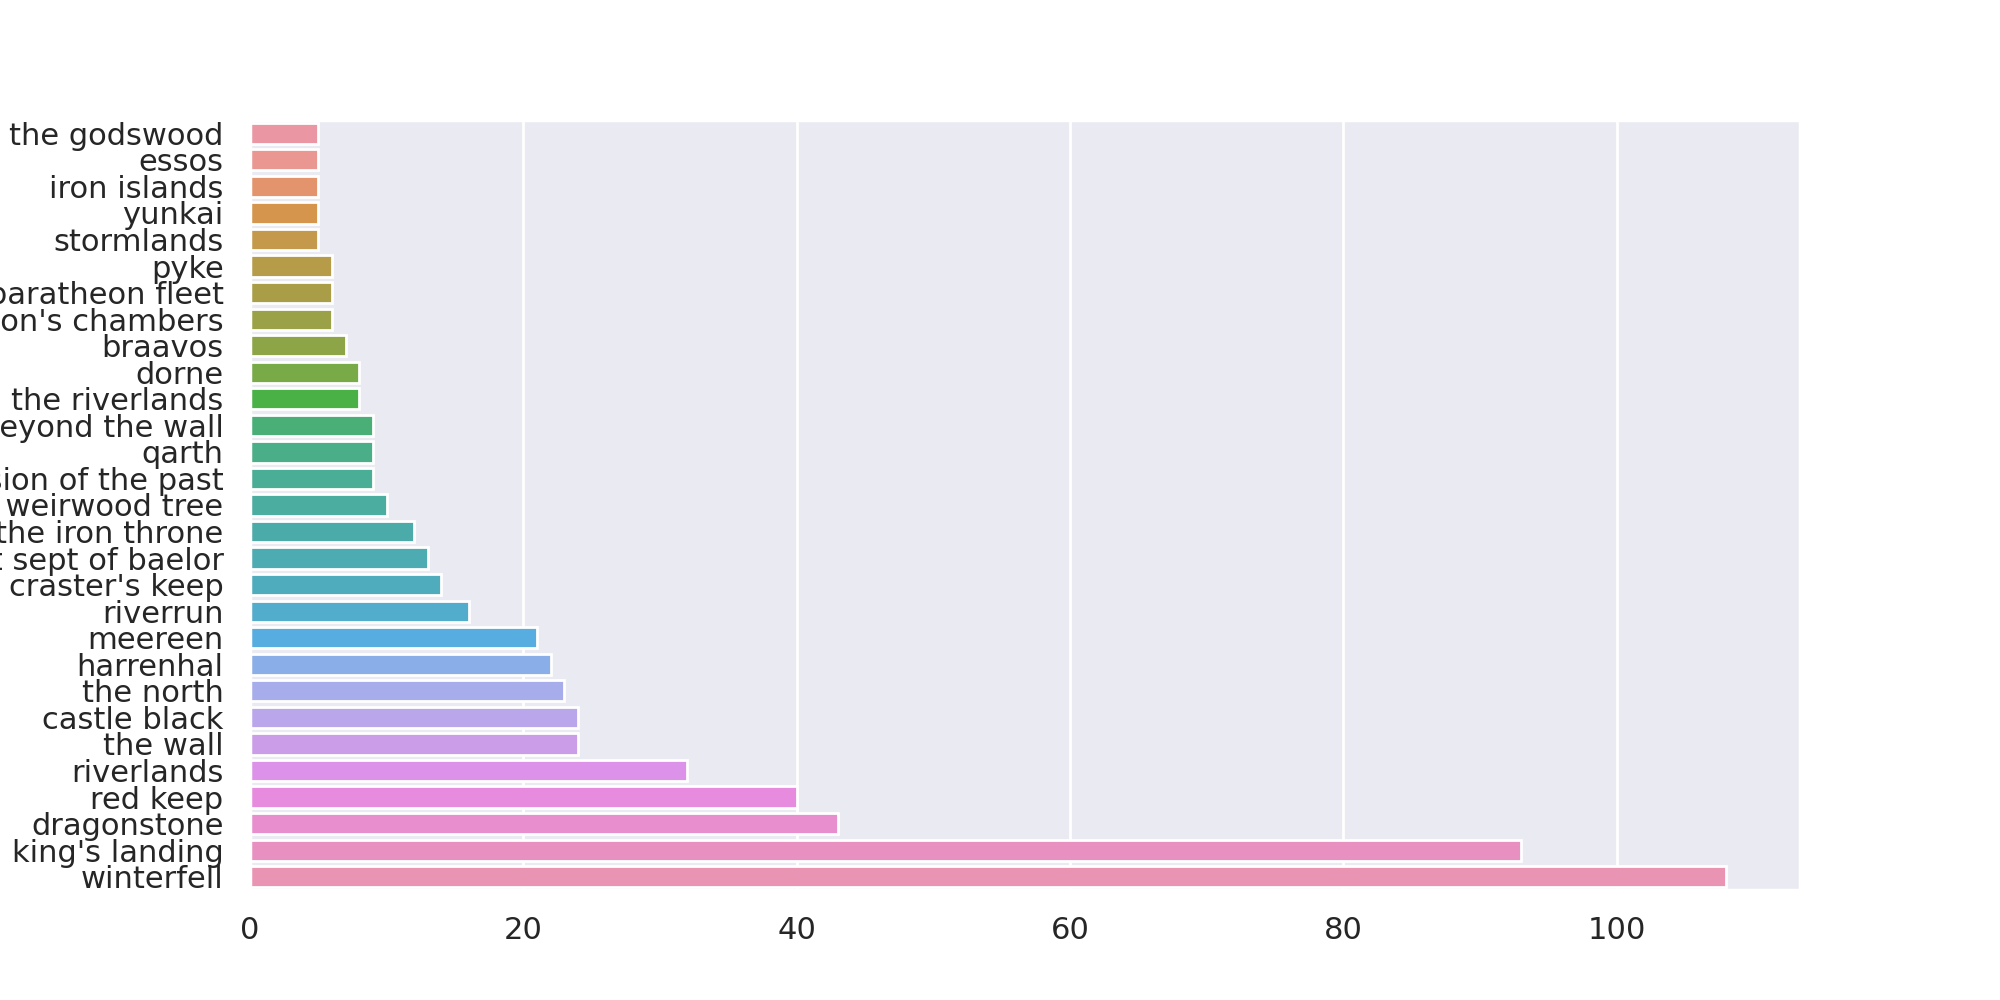

In [353]:

# Numbers of Scenes in each location
def scenes_pr_location(D_not_null):
    scenes_count = (D_not_null
     .group_by(pl.col('Scene'))
     .agg(pl.col('scene_locations').count().alias('delme'), pl.col('scene_locations').first())
     .group_by(pl.col('scene_locations'))
     .agg(pl.col('Scene').count().alias('count'))
    )
    return scenes_count

scenes_count = scenes_pr_location(D_not_null)
tmp = scenes_count.filter(pl.col('count') > 4).sort(pl.col('count'))
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=tmp['scene_locations'].to_numpy(), x=tmp['count'].to_numpy())


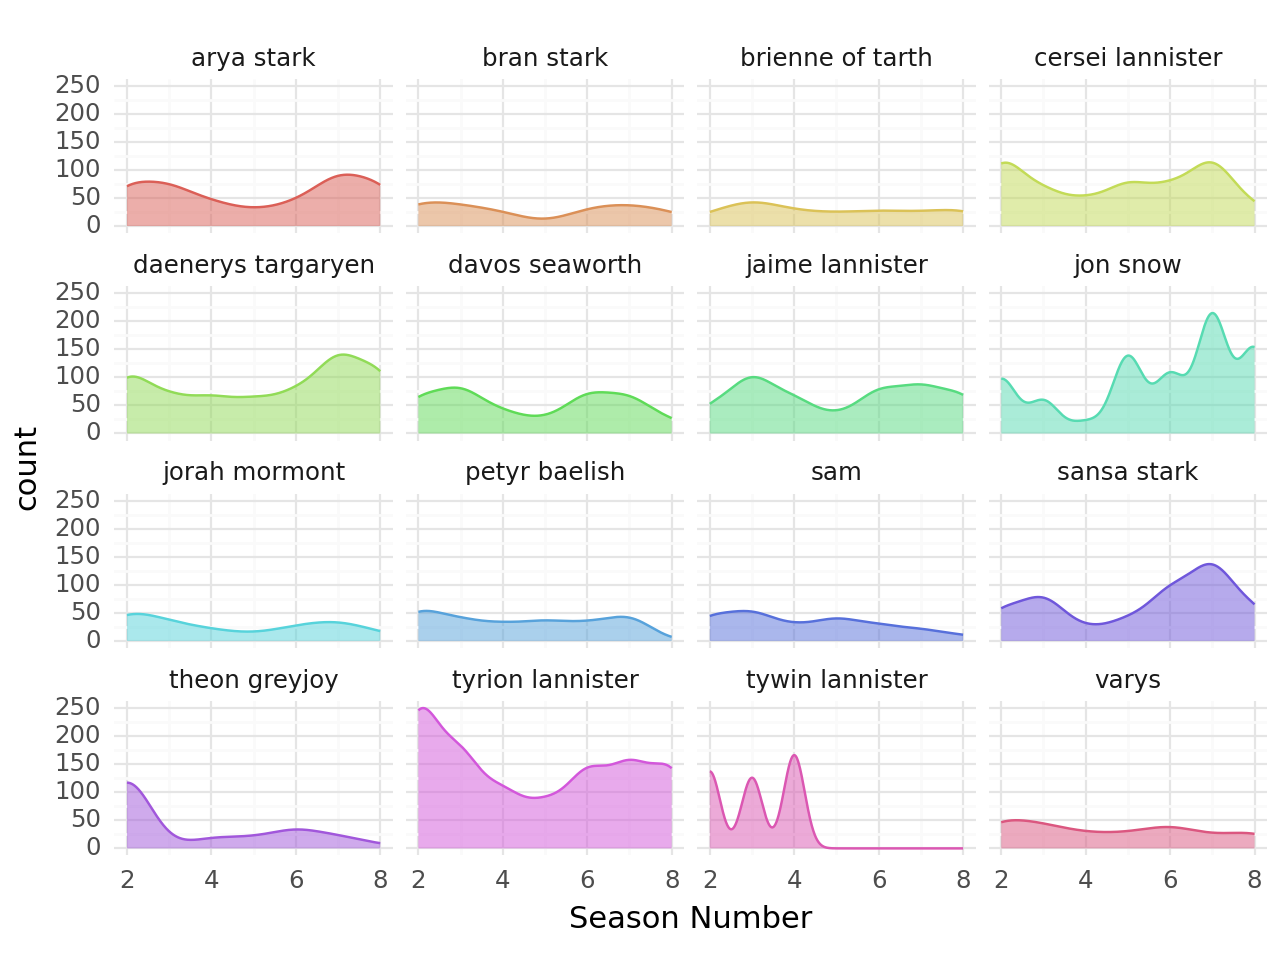

<Figure Size: (640 x 480)>

In [356]:
## Final cool plot
def cool_plot(D_not_null, to_plot, to_compare, threshold):
    from plotnine import ggplot, geom_density, aes, facet_wrap, labs, theme, geom_histogram
    from plotnine.coords import coord_flip
    from plotnine.mapping import after_stat
    from plotnine.themes import theme_minimal
    import numpy as np

    Dpd = (D_not_null
         .group_by(pl.col(to_compare))
         .agg(pl.col(to_plot).count().alias('number_lines'), 
              pl.col(to_plot).first(), 
              pl.col('SeasonNr').first())
         .to_pandas()
     )
    
    Dpd['rowcount'] = Dpd.groupby(by=[to_plot])['number_lines'].transform('count')
    Dpd = Dpd[Dpd.rowcount > threshold]
    #Dpd = D_not_null.filter(pl.col('scene_locations').is_in(["king's landing",'winterfell','dragonstone','riverlands'])).to_pandas()
    
    sick_polt=(ggplot(Dpd, aes(x='SeasonNr',color=to_plot, fill=to_plot))
        + geom_density(aes(y=after_stat('count')), alpha=0.5)
    #    + geom_density(alpha=0.5)
    #    + coord_flip()
    #    + geom_histogram(bins=8)
        + facet_wrap('~'+to_plot)
        + labs(x='Season Number',color=to_plot, fill=to_plot)
        + theme_minimal()
        + theme(legend_position='none',)
    )
    return sick_polt


###### PLOTTING #####
## What to plot for eg ~Person
to_plot = 'Person'
#to_plot = 'scene_locations'

# What to actual count per ~to_plot
to_compare = 'ScreenLine'
#to_compare = 'Scene'

# Entries with above threshold to show
threshold = 200

# Plotting
cool_plot(D_not_null, to_plot, to_compare, threshold)

### GARBAGE

In [140]:
import wordcloud

In [58]:
D.filter(
    pl.col('SeasonNr') == 1
).select(pl.col('Scene')).unique()

Scene
str
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene_…"
"""Unnamed Scene"""
"""Unnamed Scene_…"


In [ ]:
from plotnine import ggplot, geom_density, aes, facet_wrap, labs, theme, geom_histogram
from plotnine.coords import coord_flip
from plotnine.mapping import after_stat
from plotnine.themes import theme_minimal
import numpy as np

to_plot = 'Person'
threshold = 10

Dpd = (D_not_null
     .group_by(pl.col('Scene'))
     .agg(pl.col(to_plot).count().alias('number_lines'), 
          pl.col(to_plot).first(), 
          pl.col('SeasonNr').first())
     .to_pandas()
 )

Dpd['rowcount'] = Dpd.groupby(by=[to_plot])['number_lines'].transform('count')
Dpd = Dpd[Dpd.rowcount > threshold]
#Dpd = D_not_null.filter(pl.col('scene_locations').is_in(["king's landing",'winterfell','dragonstone','riverlands'])).to_pandas()

(ggplot(Dpd, aes(x='SeasonNr',color=to_plot, fill=to_plot))
    + geom_density(aes(y=after_stat('count')), alpha=0.5)
#    + geom_density(alpha=0.5)
#    + coord_flip()
#    + geom_histogram(bins=8)
    + facet_wrap('~'+to_plot)
    + labs(x='Season Number',color=to_plot, fill=to_plot)
    + theme_minimal()
    + theme(legend_position='none',)
)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

def scenes_pr_location(D_not_null):
    scenes_count = (D_not_null
     .group_by(pl.col('Scene'))
     .agg(pl.col('scene_locations').count().alias('delme'), pl.col('scene_locations').first())
     .group_by(pl.col('scene_locations'))
     .agg(pl.col('Scene').count().alias('count'))
    # .filter(pl.col('scene_locations').is_in(["king's landing",'winterfell','dragonstone','riverlands']))
    )
    return scenes_count

#tmp = Dtmp.filter(pl.col('count') > 1).sort(pl.col('count'))
#sns.barplot(y=tmp['scene_locations'].to_numpy(), x=tmp['count'].to_numpy())

plt, axes = plt.subplots(4,2)
seasons_to_plot=[2,2,3,4,5,6,7,8]

for season, ax in zip(seasons_to_plot, axes.ravel()):
    to_plot = scenes_pr_location(D_not_null.filter(pl.col('SeasonNr') == season)).sort(pl.col('count')).to_pandas()
    sns.barplot(ax = ax,y=to_plot['scene_locations'],x=to_plot['count'])
    ax.set_title('Season: ' + str(season))
plt.tight_layout()
plt.show()
#to_plot['count']

In [ ]:
from plotnine import ggplot, geom_density, aes, facet_wrap, labs, theme, geom_histogram
from plotnine.coords import coord_flip
from plotnine.mapping import after_stat
from plotnine.themes import theme_minimal
import numpy as np
Dpd = (D_not_null
     .group_by(pl.col('Scene'))
     .agg(pl.col('scene_locations').count().alias('number_lines'), 
          pl.col('scene_locations').first(), 
          pl.col('SeasonNr').first())
     .to_pandas()
 )

Dpd['rowcount'] = Dpd.groupby(by=['scene_locations'])['number_lines'].transform('count')
Dpd = Dpd[Dpd.rowcount > 10]
#Dpd = D_not_null.filter(pl.col('scene_locations').is_in(["king's landing",'winterfell','dragonstone','riverlands'])).to_pandas()

(ggplot(Dpd, aes(x='SeasonNr',color='scene_locations', fill='scene_locations'))
    + geom_density(aes(y=after_stat('count')), alpha=0.5)
#    + geom_density(alpha=0.5)
#    + coord_flip()
#    + geom_histogram(bins=8)
    + facet_wrap('~scene_locations')
    + labs(x='Season Number',color='Scene Location', fill='Scene Location')
    + theme_minimal()
    + theme(legend_position='none',)
)
